<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [2]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn

In [3]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [4]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [7]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16,year
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN,2017.0
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN,2017.0
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN,2017.0


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [8]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [9]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

---
# Ejercicios

### Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

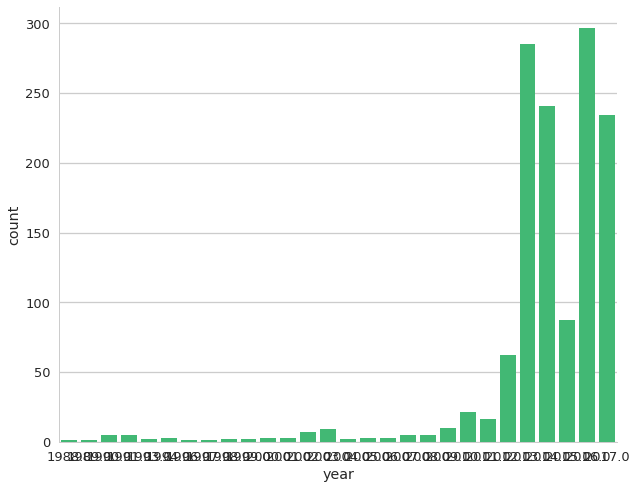

In [32]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = 10, 8

seaborn.countplot(dataset.year, color='#2ecc71')
seaborn.despine()

In [46]:
fdps = pandas.DataFrame(dataset.year.value_counts(normalize=True).sort_index())
fdps

,year
1988.0,0.000760
1989.0,0.000760
1990.0,0.003799
1991.0,0.003799
1993.0,0.001520
1994.0,0.002280
1996.0,0.000760
1997.0,0.000760
1998.0,0.001520
1999.0,0.001520


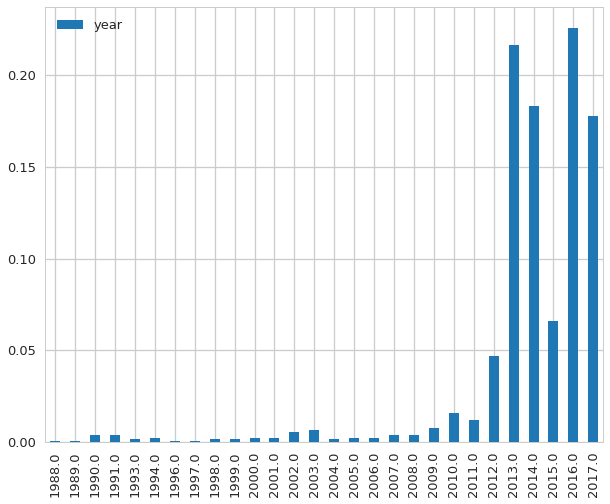

In [30]:
fdps.plot(kind='bar')

Ambos graficos son iguales salvo por la escala del eje Y, ya que uno muestra la frecuencia de ocurrencia y el otro por probabilidad.

En el gráfico se muestra como crece en los últimos años las denuncias, con un decaimiento en el año 2015 que coincidió con un cambio de gobierno. Si bien es marcado el crecimiento de las denuncias en los últimos años, con esto no se puede afirmar el crecimiento de la violencia institucional, ya que puede ser que lo que haya crecido en los últimos años haya sido las posibilidades y las facilidades para denunciar.

In [63]:
fda = fdps.cumsum()
fda

,year
1988.0,0.000760
1989.0,0.001520
1990.0,0.005319
1991.0,0.009119
1993.0,0.010638
1994.0,0.012918
1996.0,0.013678
1997.0,0.014438
1998.0,0.015957
1999.0,0.017477


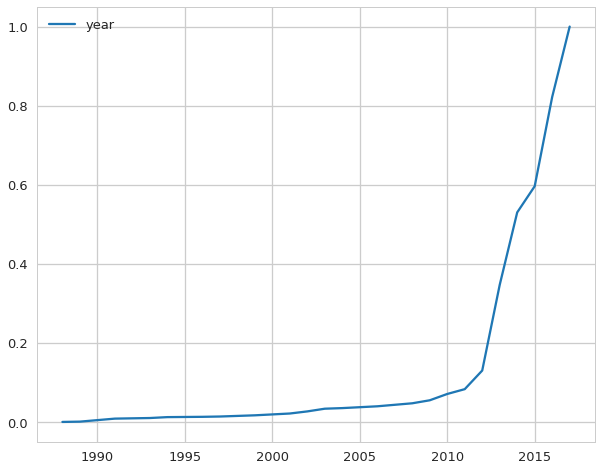

In [64]:
fda.plot()

La probabilidad de que haya una denuncia de un acto de violencia antes del cambio del último gobierno es de 0.596505 como se observa en la tabla de probabilidades acumuladas.

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?
* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

In [71]:
fdps = pandas.DataFrame(dataset.provincia.value_counts(normalize=True))
fdps

,provincia
Buenos Aires,0.693182
Ciudad de Buenos Aires,0.083097
Córdoba,0.036932
Chubut,0.026278
Chaco,0.020597
Rio Negro,0.019176
Neuquen,0.014915
Santa Fe,0.014205
Mendoza,0.012074
Salta,0.012074


Para tener una mejor referencia de los datos sería conveniente poder ponderarlo por la cantidad de habitantes de cada provincia. 

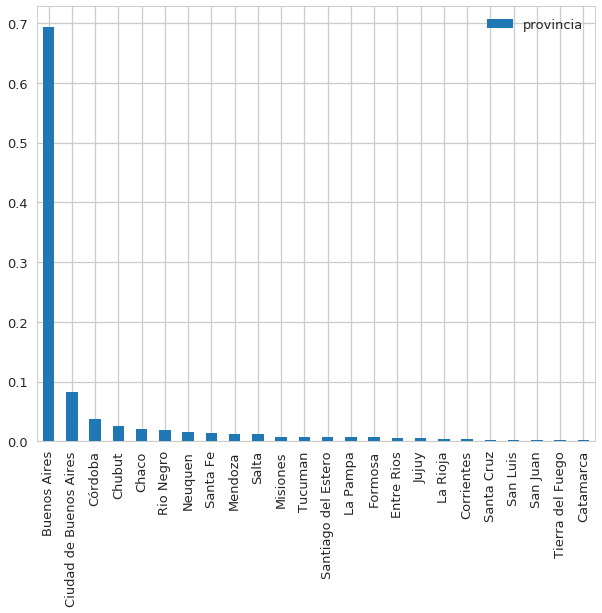

In [72]:
fdps.plot(kind='bar')

### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


In [245]:
dataset_sin_na = dataset.dropna(axis=0, subset=['year', 'provincia'])
provincias = dataset_sin_na.provincia.unique()
years = dataset_sin_na.year.unique()
serie = dataset_sin_na.groupby(['year', 'provincia']).size()/(len(dataset_sin_na))
tabla = pandas.DataFrame(serie)
tabla = tabla.reset_index(level=['year', 'provincia']).pivot(index='year', columns='provincia', values=0)

tabla = tabla.fillna(0)

tabla

provincia,Buenos Aires,Catamarca,Chaco,Chubut,Ciudad de Buenos Aires,Corrientes,Córdoba,Entre Rios,Formosa,Jujuy,...,Neuquen,Rio Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,Tierra del Fuego,Tucuman
year,,,,,,,,,,,,,,,,,,,,,
1988.0,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1989.0,0.000766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1990.0,0.000000,0.000000,0.003065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1991.0,0.002299,0.000000,0.000000,0.000000,0.001533,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1993.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001533,0.000000,0.000000,0.000000,0.000000,0.000000
1994.0,0.000766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000,0.000000,0.000000
1996.0,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1997.0,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998.0,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [246]:
criterio = 0.005

def son_independientes(tabla):
    for provincia in provincias:
        for year in years:
            if abs(tabla.loc[year, provincia] - tabla.loc[year].sum()*tabla[provincia].sum()) > criterio:
                return 'No son independientes'
    return "Son independientes"

son_independientes(tabla)

'No son independientes'

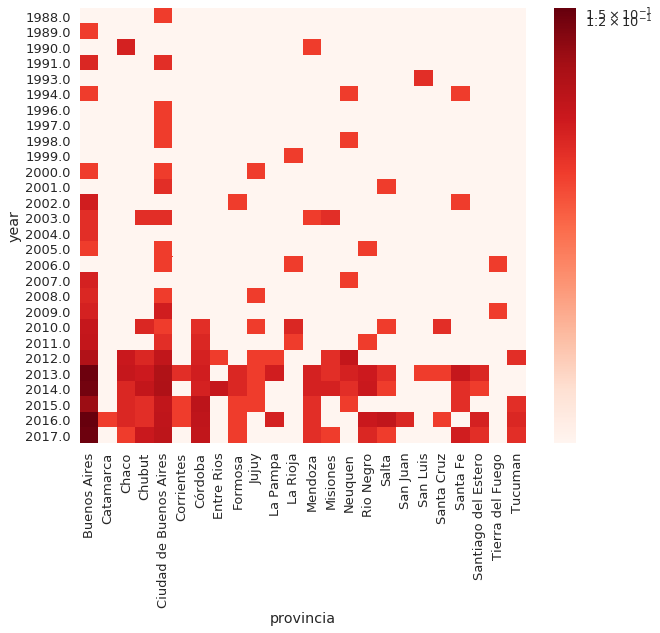

In [250]:
from matplotlib.colors import LogNorm

seaborn.heatmap(tabla + 0.0000001, linewidths=0, cmap='Reds', norm=LogNorm(0.0000001, 1))


## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(M~~|~~N)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
* ¿Podemos concluir en que son eventos independientes dadas las muestras?